<a href="https://colab.research.google.com/github/ReinerJasin/ai-app-sys/blob/main/week9_12224827.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this week 9 session, we are going to learn about the usage of linear regression by using boston housing dataset. We will also see about the technique to standardize a data.

In [1]:
# Import needed libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import logging

# Set level for TensorFlow logger instance
tf.get_logger().setLevel(logging.ERROR)

# Define the hyperparameters
EPOCHS = 500
BATCH_SIZE = 16

# Read the boston housing data provided by keras
boston_housing = keras.datasets.boston_housing

# Assign the dataset value into variables
(raw_x_train, y_train), (raw_x_test, y_test) = boston_housing.load_data()

# Process of counting the mean and standard deviation
x_mean = np.mean(raw_x_train, axis = 0)
x_stddev = np.std(raw_x_train, axis = 0)

# Extract new values to be used as train and test dataset
x_train = (raw_x_train - x_mean) / x_stddev
x_test = (raw_x_test - x_mean) / x_stddev

57026/57026 [==============================] - 0s 0us/step


From the last step of the code above, we can see that we just extracted a new train data instead of using raw boston housing dataset. Why? <br><br>

In this step, we standardize the data to make the data smoother. It's gonna affect the result of the model later because the range and scale of the data is adjusted to provide better result even if we added new input variables.

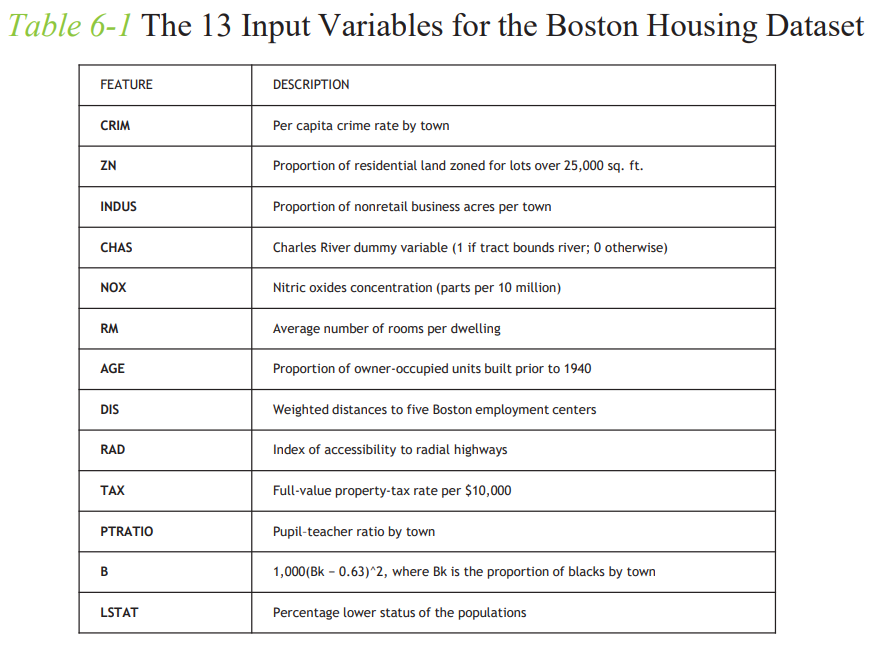

On this step, we are going to create a sequential model to do the linear regression. Linear Regression is just like a simple mathematical equation W = ax + b. But this time, we have 13 different input variables (based on the dataset) and at the same time we will find the best value for the weight for each variables (this way we will know how significant that variable to make prediction).

In a linear regression process, the result is always a number of a prediction based on the mathematical formula with certain weight. In this case, the accuracy of the prediction is not really that important, because it's gonna be hard to make a exact prediction about prices. That's why we don't use accuracy as the metrics for the result. Instead, we are going to use mean squared error to show how far the prediction result from the actual prices. And by that, the lower the mean squared error for the test data, the better the result is.

In [2]:
# Create and train model
model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = [13]))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mean_absolute_error'])
model.summary()
history = model.fit(x_train,
                    y_train,
                    validation_data = (x_test, y_test),
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    verbose = 2,
                    shuffle = True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
26/26 - 4s - loss: 528.4959 - mean_absolute_error: 21.0721 - val_loss: 492.0575 - val_mean_absolute_error: 20.2445 - 4s/epoch - 136ms/step
Epoch 2/500
26/26 - 0s - loss: 385.3353 - mean_absolute_error: 17.4602 - val_loss: 305.8186 - val_mean_absolute_error: 15.3491 - 94ms/epoch - 4ms/step
Epoch 3/500
26/2

We can see that the mean absolute error is decreasing from the first training until the last training. that means our model is getting a better result each epoch.

We can keep going by increasing the number of epoch, but do it as needed. If the accuracy is not increasing anymore or maybe overfit happens, then we can use standard regulization to fix the overfitting. But this step will be explained further in the following session.